In [1]:
import yfinance as yf
import numpy as np

In [72]:
# Step 1: Collect historical SPY data
symbol = "SPY"  # S&P500 ETF ticker symbol
start_date = "2000-01-01"
end_date = "2023-06-20"
data = yf.download(symbol, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [73]:
# Step 2: Identify gaps
data['Previous_High'] = data['High'].shift(1)
data['Previous_Low'] = data['Low'].shift(1)
data['Gap'] = data['Open'].where(data['Open'].gt(data['Previous_High']) | data['Open'].lt(data['Previous_Low']))

In [80]:

# Step 3: Calculate gap fill time
data['Gap_Fill_Days'] = np.nan
for i in range(len(data)):
    if not np.isnan(data['Gap'][i]):
        gap_value = data['Gap'][i] - data['Close'][i-1]
        gap_close = data['Close'][i-1] 
        for j in range(i+1, len(data)):
            if gap_value < 0:
                if data['High'][j] >= gap_close:
                    data['Gap_Fill_Days'][i] = j - i
                    break
                if j == len(data) - 1:
                    data['Gap_Fill_Days'][i] = 96000
                    break
            elif gap_value > 0:
                if data['Low'][j] <= gap_close:
                    data['Gap_Fill_Days'][i] = j - i
                    break
                if j == len(data) - 1:
                    data['Gap_Fill_Days'][i] = 96000
                    break

C:\Users\saats\AppData\Local\Temp/ipykernel_18672/2978211516.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Gap_Fill_Days'][i] = j - i
C:\Users\saats\AppData\Local\Temp/ipykernel_18672/2978211516.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Gap_Fill_Days'][i] = j - i
C:\Users\saats\AppData\Local\Temp/ipykernel_18672/2978211516.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Gap_Fill_Days'][i] = 9600

In [81]:
# Step 4: Compute average and distribution
average_fill_time = data['Gap_Fill_Days'].mean()
gap_fill_distribution = data['Gap_Fill_Days'].value_counts().sort_index()

print("Average number of days to fill gaps:", average_fill_time)
print("Distribution of gap fill time:")
print(gap_fill_distribution)

Average number of days to fill gaps: 2791.4577137546466
Distribution of gap fill time:
1.0        1045
2.0         215
3.0         116
4.0          82
5.0          58
           ... 
1408.0        1
1434.0        1
1512.0        1
1676.0        1
96000.0      62
Name: Gap_Fill_Days, Length: 171, dtype: int64


In [90]:
# Bin number of days to fill gaps into 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15+ days
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 30, 2000, np.inf]
gap_fill_distribution = data['Gap_Fill_Days'].value_counts(bins=bins).sort_index()

In [91]:
gap_fill_probabilities = gap_fill_distribution/sum(gap_fill_distribution)

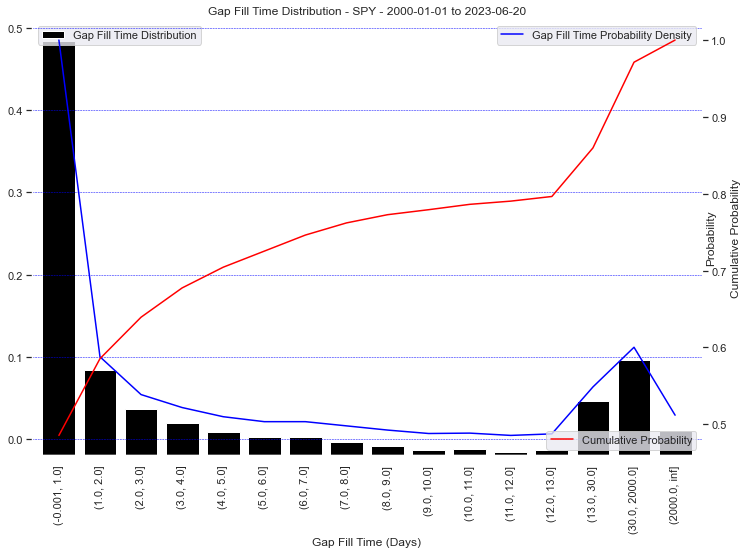

In [92]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
gap_fill_distribution.plot(kind='bar', ax=ax, label='Gap Fill Time Distribution', width=0.8, color='black')
ax.set_xlabel('Gap Fill Time (Days)')
ax.set_ylabel('Frequency')
ax.set_title(f'Gap Fill Time Distribution - {symbol} - {start_date} to {end_date}')
ax2 = ax.twinx()
gap_fill_probabilities.plot(kind='line', ax=ax2, label='Gap Fill Time Probability Density', color='blue')
ax2.set_ylabel('Probability')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

# Add cumulative probability
ax3 = ax2.twinx()
gap_fill_probabilities.cumsum().plot(kind='line', ax=ax3, label='Cumulative Probability', color='red')
ax3.set_ylabel('Cumulative Probability')
ax3.legend(loc='lower right')   

# Hide ax labels
ax.yaxis.set_visible(False)


# disable grid
ax.grid(False)
ax2.grid(color='blue', linestyle='--', linewidth=0.5)
ax3.grid(False)
ax.set_facecolor('white')
plt.show()

In [89]:
data['Gap_Fill_Days'].tail(20)

Date
2023-05-19        1.0
2023-05-22        NaN
2023-05-23        3.0
2023-05-24        1.0
2023-05-25    96000.0
2023-05-26        NaN
2023-05-30        1.0
2023-05-31        1.0
2023-06-01        NaN
2023-06-02    96000.0
2023-06-05        NaN
2023-06-06        NaN
2023-06-07        NaN
2023-06-08        NaN
2023-06-09    96000.0
2023-06-12        NaN
2023-06-13        1.0
2023-06-14        NaN
2023-06-15        NaN
2023-06-16        NaN
Name: Gap_Fill_Days, dtype: float64